<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/kaggle_sep_compet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.rcParams['figure.figsize'] = (10, 5)


# https://www.kaggle.com/competitions/tabular-playground-series-sep-2022/data?select=test.csv

df = pd.read_csv('train.csv')
df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [ ]:
# convert column with date to datetime format and we also make columns with day, week, month, year, day of week and month-year combo
df['date'] = pd.to_datetime(df['date'])
df['mnth_yr'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year 
df['day_of_week'] = df['date'].dt.dayofweek

# create unique full name for combination of columns
df['full_name'] = df['store'] + '+' + df['country'] + '+' + df['product']

# Check if there any nan's.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id       70128 non-null  int64         
 1   date         70128 non-null  datetime64[ns]
 2   country      70128 non-null  object        
 3   store        70128 non-null  object        
 4   product      70128 non-null  object        
 5   num_sold     70128 non-null  int64         
 6   mnth_yr      70128 non-null  object        
 7   month        70128 non-null  int64         
 8   day          70128 non-null  int64         
 9   year         70128 non-null  int64         
 10  day_of_week  70128 non-null  int64         
 11  full_name    70128 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 6.4+ MB


In [ ]:
# we have records for 4 years
print('Min date: ', df['date'].min(), 'max date: ', df['date'].max() )

Min date:  2017-01-01 00:00:00 max date:  2020-12-31 00:00:00


In [ ]:
# also check that each store located in every given country
print( 'Num of unique countries: ', df['country'].nunique())
df.groupby('store')['country'].nunique()

Num of unique countries:  6


store
KaggleMart    6
KaggleRama    6
Name: country, dtype: int64

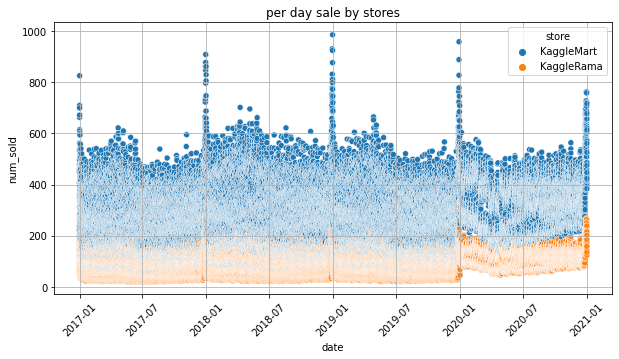

In [ ]:
# lets also look on it with all dates in scatter
ax = sns.scatterplot(data = df, x = 'date', hue = 'store', y = 'num_sold')
ax.set_title('per day sale by store')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


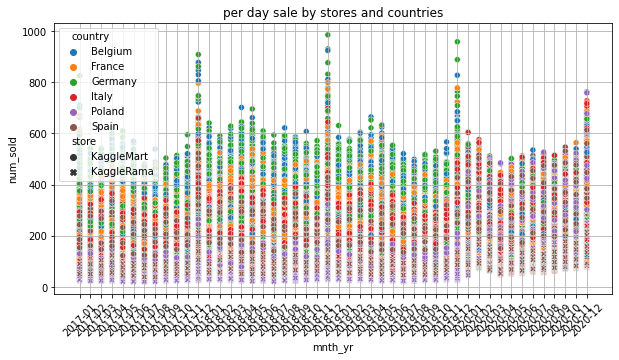

In [ ]:
# and lets try group it by country. Messy, even though some insights are seen
ax = sns.scatterplot(data = df, x = 'mnth_yr', hue = 'country', y = 'num_sold', style = 'store')
ax.set_title('per day sale by stores and countries')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

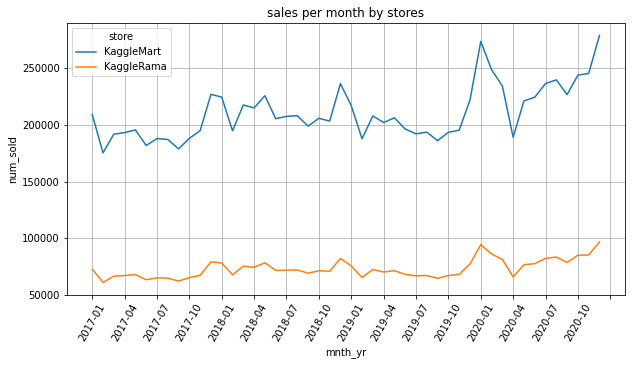

In [ ]:
# sum sales per month by store
year_n_month = df.groupby(['store', 'mnth_yr'])['num_sold'].sum().reset_index().sort_values('mnth_yr')

ax = sns.lineplot(data = year_n_month, x = 'mnth_yr', hue = 'store', y = 'num_sold')
ax.set_title('sales per month by store')
plt.xticks(rotation = 60, ticks = [ x for x in range(0, len(year_n_month)//2 + 1, 3)])
plt.grid()
plt.show()

In [ ]:
year_n_month.groupby('store')['num_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
store,,,,,,,,
KaggleMart,48.0,210776.125000,23536.173831,175275.0,193395.25,206042.5,224849.0,279030.0
KaggleRama,48.0,73091.770833,8130.273443,60863.0,67000.50,71408.5,78133.5,96674.0


In [ ]:
df.groupby('store')['num_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
store,,,,,,,,
KaggleMart,35064.0,288.536790,113.48904,57.0,206.0,283.0,369.0,986.0
KaggleRama,35064.0,100.057181,39.52239,19.0,71.0,98.0,128.0,354.0


We see that stores have different mean revenue and variation in KaggleMart sales is way higher than in KaggleRama. But seasonal patterns are much alike - falls after New Year with little lift at spring, summer is an offseason and since a start of autumn salse are rising. But KaggleRama's line is smoother.
Also interesting fact - in crazy 2020 year both stores got their alltime lows and alltime highes.


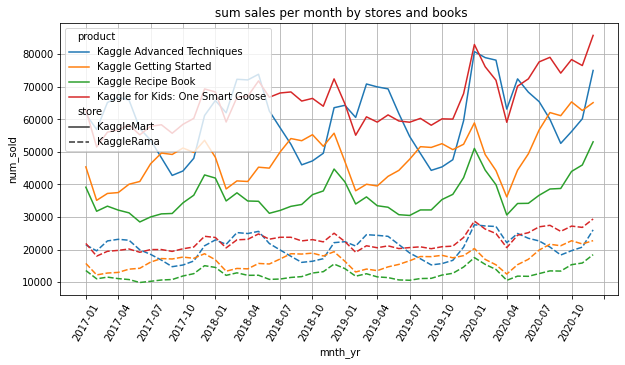

In [ ]:
year_n_month_books = df.groupby(['store', 'mnth_yr', 'product'])['num_sold'].sum().reset_index().sort_values('mnth_yr')

ax = sns.lineplot(data = year_n_month_books, x = 'mnth_yr', hue = 'product', y = 'num_sold', style = 'store')
plt.xticks(rotation = 60, ticks = [ x for x in range(0, len(year_n_month)//2 + 1, 3)])
ax.set_title(' sum sales per month by store and book')
plt.grid()
plt.show()

Same thoughts as with previous chart. Looking at all ups and falls of every book wen can not explain their reasons - is it lack of demand or supply problems or anything else. Also, after 04.2020 sales are running up with every book except Advanced Techniques.

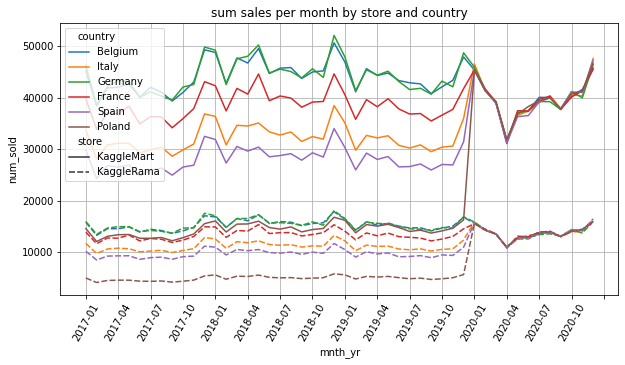

In [ ]:
# sum sales per month by store and country

year_n_month_countries = df.groupby(['store', 'mnth_yr', 'country'])['num_sold'].sum().reset_index().sort_values('mnth_yr')

ax = sns.lineplot(data = year_n_month_countries, x = 'mnth_yr', hue = 'country', y = 'num_sold', style = 'store')
plt.xticks(rotation = 60, ticks = [ x for x in range(0, len(year_n_month)//2 + 1, 3)])
ax.set_title('sum sales per month by store and country')
plt.grid()
plt.show()

Now it's interesting. With the end od 2019 all sales per country are almost the same in both stores. Poland had a great jump. The reason? Was it some supply or stocks limitation and both stores decided to distribute all goods equally between countries? What else? We just can't get the knowledge of it from data.

In [ ]:
# average revenue per store and year

df.groupby(['store', df['date'].dt.year])['num_sold'].mean().reset_index()

,store,date,num_sold
0,KaggleMart,2017,263.797146
1,KaggleMart,2018,290.358790
2,KaggleMart,2019,273.956849
3,KaggleMart,2020,325.931922
4,KaggleRama,2017,91.472603
5,KaggleRama,2018,100.671347
6,KaggleRama,2019,95.093265
7,KaggleRama,2020,112.956170


And we see that sales in 2020 are the top ones. Even though sales in top markets (Belgium, Germany) falls. Right because of those lines merging we saw above.

In [ ]:

year_n_month_countries_books = df.groupby(['store', 'mnth_yr', 'country', 'product'])['num_sold'].sum().reset_index().sort_values('mnth_yr')

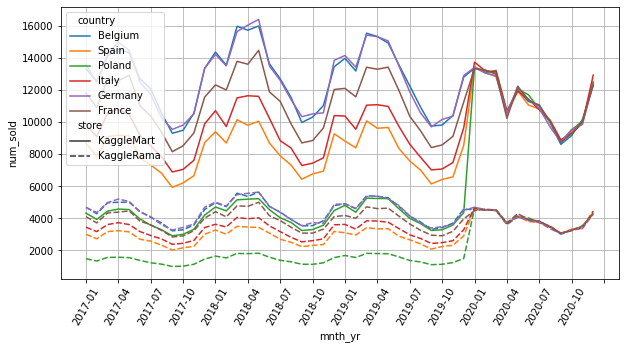

In [ ]:
# Advanced Techniques sales per store and country
ax = sns.lineplot(data = year_n_month_countries_books[year_n_month_countries_books['product'] == 'Kaggle Advanced Techniques'], x = 'mnth_yr', hue = 'country', y = 'num_sold', style = 'store')
plt.xticks(rotation = 60, ticks = [ x for x in range(0, len(year_n_month)//2 + 1, 3)])
plt.grid()
ax.set_title('Advanced Techniques sum sales per motnh by store and country')
plt.show()

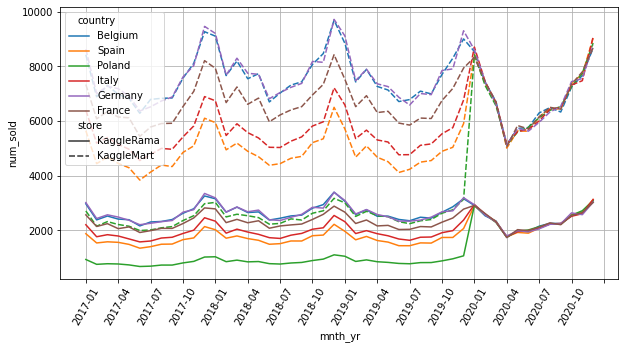

In [ ]:
# Recipe Book  sales per store and country
ax = sns.lineplot(data = year_n_month_countries_books[year_n_month_countries_books['product'] == 'Kaggle Recipe Book'], x = 'mnth_yr', hue = 'country', y = 'num_sold', style = 'store')
plt.xticks(rotation = 60, ticks = [ x for x in range(0, len(year_n_month)//2 + 1, 3)])
plt.grid()
ax.set_title('Recipe Book sum sales per motnh by store and country')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


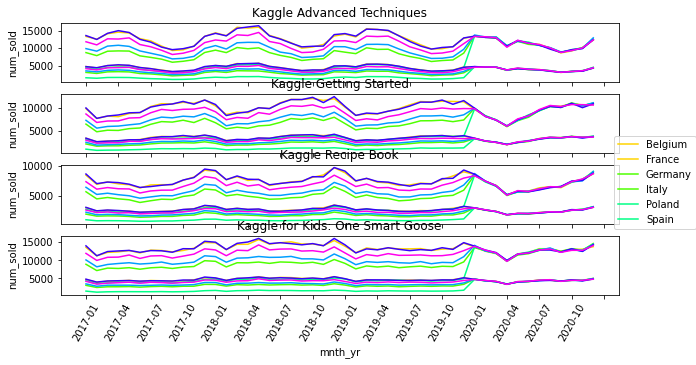

In [ ]:
# for every product per country and store

books_list = list(df['product'].unique())

fig, axs = plt.subplots(4, sharex=True)


plt.rcParams['figure.figsize'] = (16, 12)

for num, el in enumerate(books_list):

    sns.lineplot(data = year_n_month_countries_books[year_n_month_countries_books['product'] == el],
                 x = 'mnth_yr', hue = 'country', y = 'num_sold', style = 'store', ax = axs[num], dashes=False, palette = 'hsv')
    
    axs[num].get_legend().remove()
    axs[num].set_title(el)
    plt.xticks(rotation = 60, ticks = [ x for x in range(0, len(year_n_month)//2 + 1, 3)])

fig.legend([axs[0], axs[1], axs[2], axs[3]], labels = list(df['country'].unique()),   
                    loc="center right",   borderaxespad=0.1,)

Sales for every book repeat mean numbers in general.

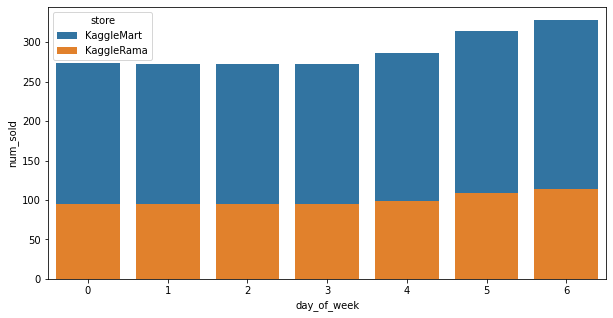

In [ ]:
# lets look at days of week means

plt.rcParams['figure.figsize'] = (10, 5)

by_dw = df.groupby(['store','day_of_week'])['num_sold'].mean().reset_index() 
sns.barplot(data = by_dw, x = 'day_of_week', y = 'num_sold', hue = 'store', dodge = False)

# and just numbers - to see clearly the fact that we weekends sales are higher 
# df.groupby(['store', df['date'].dt.year, 'day_of_week'])['num_sold'].mean().reset_index().sort_values(['date', 'day_of_week'])

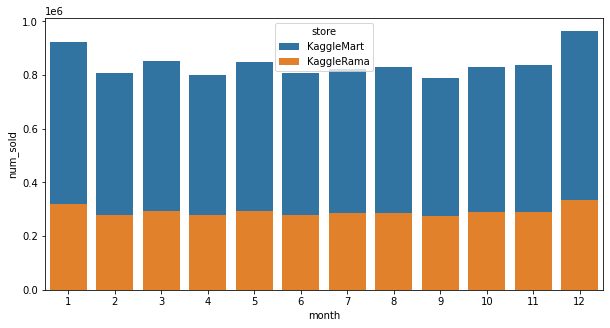

In [ ]:
# and mean by number of month
by_dw = df.groupby(['store','month'])['num_sold'].sum().reset_index() 
sns.barplot(data = by_dw, x = 'month', y = 'num_sold', hue = 'store', dodge = False)

After EDA we have some good undersatnding of how stores did in the past. Ups and downs before pandemic can be explained by seasonal changes. Big falls in 2020 follow countries lockdowns -  https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_lockdowns.  But we do not have any explanation of change in sales by country - it seems to be management decision. And that's actually a problem for any future prediction. Because in real world we would ask management about their plans: are we going to distribute our stocks equally per country as in 2020? Do we really have to make whole-year prediction based on that out-of-normality 2020? Believe me dudes -  it will get even worse in 2022.
But we will modelling with what we're given.

## Modelling

### Prohet

We start with Prophet  - a well known out-of-the-box. I tuned parameters several times and code below is just a one example

In [ ]:
from prophet import Prophet


# train_df 

train = df[['row_id', 'date', 'full_name', 'num_sold',
        'mnth_yr', 'month', 'day', 'year', 'day_of_week']].copy()
#train.head()


train = train.sort_values(['full_name', 'date' ])
tr = train[['date', 'full_name', 'num_sold']].rename(columns = {'date': 'ds', 'num_sold':'y'}).copy()
grouped_df = tr.groupby('full_name')

# list with all store-country-book combos
names = list(grouped_df.groups.keys())

def forecaster_prophet(full_name):
    
    model = Prophet(changepoint_range=0.9, yearly_seasonality=True, changepoint_prior_scale=0.08)
    model.fit(full_name)
    future = model.make_future_dataframe( periods = 365)
    forecast = model.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast['full_name'] = full_name['full_name'].iloc[0]

    return forecast


# df for predictions
new_df = pd.DataFrame()

for name in names:
    full_name = grouped_df.get_group(name)
    forecast = forecaster_prophet(full_name)
    new_df = pd.concat([new_df, forecast])

new_df.head()

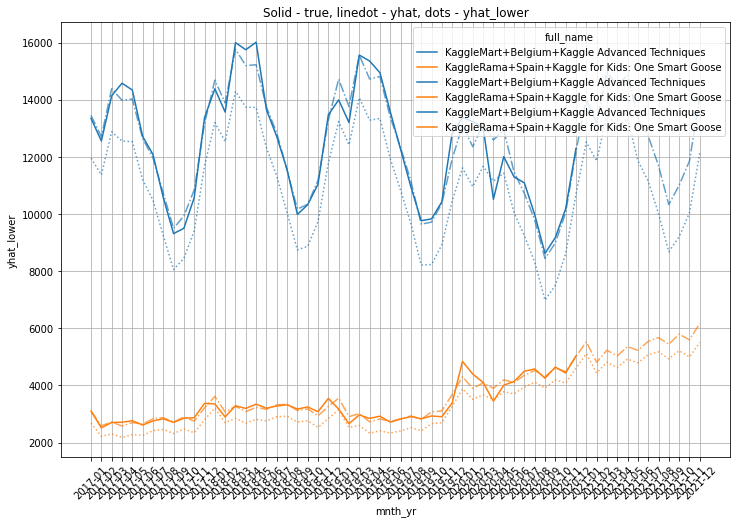

In [ ]:
# lets plot just two of all 48 combos to see predictions yhat and true values. Solid - true, linedot - yhat, dots - yhat_lower

plt.rcParams['figure.figsize'] = (12, 8)
l = ['KaggleRama+Spain+Kaggle for Kids: One Smart Goose', 'KaggleMart+Belgium+Kaggle Advanced Techniques']
new_df['mnth_yr'] = new_df['ds'].apply(lambda x: x.strftime('%Y-%m'))
g = new_df[new_df['full_name'].isin(l)].groupby(['full_name', 'mnth_yr'])['yhat_lower'].sum().reset_index().sort_values('mnth_yr')

sns.lineplot(data = g, x = 'mnth_yr', y = 'yhat_lower', hue = 'full_name', linestyle = "dotted", alpha = 0.7)

g = df[df['full_name'].isin(l)].groupby(['full_name', 'mnth_yr'])['num_sold'].sum().reset_index().sort_values('mnth_yr')

sns.lineplot(data = g, x = 'mnth_yr', y = 'num_sold', hue = 'full_name')

g = new_df[new_df['full_name'].isin(l)].groupby(['full_name', 'mnth_yr'])['yhat'].sum().reset_index().sort_values('mnth_yr')

sns.lineplot(data = g, x = 'mnth_yr', y = 'yhat', hue = 'full_name', linestyle='dashdot', alpha = 0.7)
plt.xticks(rotation = 45)
plt.title('Solid - true, linedot - yhat, dots - yhat_lower')

plt.grid()
plt.show()

In [ ]:
# evaluation with just yhat. Prophet with default parameters gave SMAPE = 12.32

new_df[['store', 'country', 'product']] = new_df['full_name'].str.split('+', expand = True)

fin = new_df.sort_values(['ds', 'country', 'store', 'product'])
fin = fin[fin['ds'] >= '2021-01-01']
fin['num_sold'] = fin['yhat'].round().astype(int)
fin['row_id'] = [x for x in range(70128,  70128+len(fin) ) ]
res = fin[['row_id', 'num_sold']].reset_index().drop('index', axis = 1).copy()
#res.to_csv('res.csv', index= False)


Prophet with default parameters and yhat as a predicted value gave SMAPE = 12.32. With some tuned parameters around 11. And yhat_lower gave me 10.53. Every tim Prophet predictions were higher than actual values.

### XGB

Now we'll try XGB

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

import xgboost as xgb
from xgboost import plot_importance, plot_tree

# just to be sure - downloading once again and add two features - quarter and week of year
df = pd.read_csv('train.csv')
df.head()
df['full_name'] = df['store'] + '+' + df['country'] + '+' + df['product']

df['date'] = pd.to_datetime(df['date'])
df['mnth_yr'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek

# new ones
df['quarter'] = df['date'].dt.quarter
df['week_of_year'] = df['date'].dt.strftime("%U").astype(int)

train = df[[ 'date', 'full_name', 'num_sold',
         'month', 'day', 'year', 'quarter', 'week_of_year', 'day_of_week' ]].copy()
train.head()

,date,full_name,num_sold,month,day,year,quarter,week_of_year,day_of_week
0,2017-01-01,KaggleMart+Belgium+Kaggle Advanced Techniques,663,1,1,2017,1,1,6
1,2017-01-01,KaggleMart+Belgium+Kaggle Getting Started,615,1,1,2017,1,1,6
2,2017-01-01,KaggleMart+Belgium+Kaggle Recipe Book,480,1,1,2017,1,1,6
3,2017-01-01,KaggleMart+Belgium+Kaggle for Kids: One Smart ...,710,1,1,2017,1,1,6
4,2017-01-01,KaggleRama+Belgium+Kaggle Advanced Techniques,240,1,1,2017,1,1,6


at first we choose one from our combos, fit model and look feature importance. And we discover XGB considered week_of year to be the most valuable feature

[18:59:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


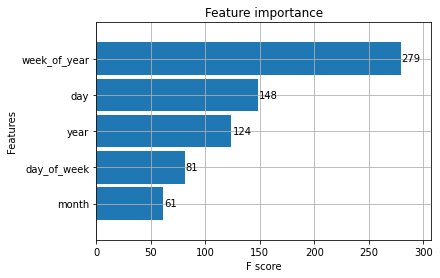

In [ ]:
# fit-predict for one combo

ma_bel_get = train[train['full_name'] == 'KaggleMart+Belgium+Kaggle Getting Started'].set_index('date').drop('full_name', axis = 1)

X_train = ma_bel_get.drop('num_sold', axis = 1)
y_train = ma_bel_get['num_sold']

xgb = xgb.XGBRegressor(n_estimators = 100)

xgb.fit(X_train, y_train)

_ = plot_importance(xgb, height=0.9)

Text(0.5, 1.0, 'xgb prediction')

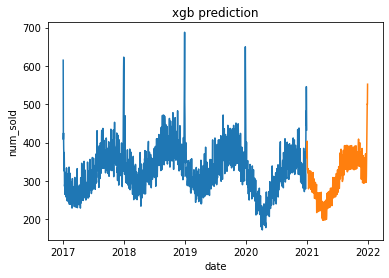

In [ ]:
# df for future 
test = pd.DataFrame({
                   'date':pd.date_range(start = '2021-01-01', end = '2021-12-31')})
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['year'] = test['date'].dt.year
test['quarter'] = test['date'].dt.quarter
test['week_of_year'] = test['date'].dt.strftime("%U").astype(int)
test['day_of_week'] = test['date'].dt.dayofweek


test = test.set_index('date')

# prediction
test['pred'] = xgb.predict(test)

# plotting
sns.lineplot( x = ma_bel_get.index, y = ma_bel_get['num_sold'])
sns.lineplot( x = test.index, y = test['pred'])
plt.title('xgb prediction')

XGB for all

In [ ]:
# now we are doing it for all. 

def forecaster_xgb(df):
    n = str(df['full_name'].unique())
    df = df[[ 'date', 'full_name', 'num_sold',
         'month', 'day', 'year', 'quarter', 'week_of_year', 'day_of_week' ]].copy()
    df = df.set_index('date').drop('full_name', axis = 1)
    X_train = df.drop('num_sold', axis = 1)
    y_train = df['num_sold']
    
    import xgboost as xgb
    xgb = xgb.XGBRegressor(eta = 0.05, max_depth= 3, n_estimators = 100)
    xgb.fit(X_train, y_train)

    test = pd.DataFrame({
                   'date':pd.date_range(start = '2021-01-01', end = '2021-12-31')})
    test['month'] = test['date'].dt.month
    test['day'] = test['date'].dt.day
    test['year'] = test['date'].dt.year
    test['quarter'] = test['date'].dt.quarter
    test['week_of_year'] = test['date'].dt.strftime("%U").astype(int)
    test['day_of_week'] = test['date'].dt.dayofweek


    test = test.set_index('date')

    test['pred'] = xgb.predict(test)
    test['full_name'] = n
    test = test.reset_index()

    return test


# list for all combos
names = list(df['full_name'].unique())

# df for predictions
new_df = pd.DataFrame()


for name in names:
    d = df[df['full_name'] == name]
    forecast = forecaster_xgb(d)
    new_df = pd.concat([new_df, forecast])


new_df[['store', 'country', 'product']] = new_df['full_name'].str.split('+', expand = True)

# preps for valuation
fin = new_df.sort_values(['date', 'country', 'store', 'product'])
fin = fin[fin['date'] >= '2021-01-01']
fin['num_sold'] = fin['pred'].round().astype(int)
fin['row_id'] = [x for x in range(70128,  70128+len(fin) ) ]
res = fin[['row_id', 'num_sold']].reset_index().drop('index', axis = 1).copy()
#res.to_csv('res.csv', index= False)



And SMAPE with xgboost(default params) - 6.62530. Way better and faster than Prophet. From plot above we may see that it studied most of trends in our data but couldn't handle some between-days changes

### XGB with cross validation and lags

Cross validation is actually a must have for modelling, so we will try to use it on time series. I also add lags for one and two years. 

This model is much slower than simple xgb and - sadly - show worse results. SMAPE = 9.39. I tried different params, changed lags (364 days instead of 365 - that numer is giving us same day of week ( 364 // 7)). I also tried SARIMA ( the code with all stationarity checks were too big ) for this competition - results were alike Prophet.

Still, default XGB is the best by its result, simplicity and speed.

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

def forecaster_xgb_cv(df):
    n = str(df['full_name'].unique())
    df = df[[ 'date', 'full_name', 'num_sold',
         'month', 'day', 'year', 'quarter', 'week_of_year', 'day_of_week' ]].copy()
    df = df.set_index('date').drop('full_name', axis = 1)
    

    test = pd.DataFrame({
                   'date':pd.date_range(start = '2021-01-01', end = '2021-12-31')})
    test['month'] = test['date'].dt.month
    test['day'] = test['date'].dt.day
    test['year'] = test['date'].dt.year
    test['quarter'] = test['date'].dt.quarter
    test['week_of_year'] = test['date'].dt.strftime("%U").astype(int)
    test['day_of_week'] = test['date'].dt.dayofweek
    test = test.set_index('date')

    df = pd.concat([df, test])

    # add one- and two-year lags 
    df['lag_1'] = df['num_sold'].shift(365 * 1)
    df['lag_2'] = df['num_sold'].shift(365 * 2)


    df_train = df[df.index < '2021-01-01']
    
    df_test = df[df.index >= '2021-01-01']
  

    from sklearn.model_selection import TimeSeriesSplit
    import xgboost as xgb

    # initialize 
    tss = TimeSeriesSplit(n_splits=5, test_size=73)
    
    # list for predictions
    preds = []

    for train_idx, val_idx in tss.split(df_train):

        # time split
        train = df_train.iloc[train_idx]
        test = df_train.iloc[val_idx]

        X_train = train.drop('num_sold', axis = 1).copy()
        y_train = train['num_sold'].copy()

        X_test = test.drop('num_sold', axis = 1).copy()
        y_test = test['num_sold'].copy()


        # model 
        reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                            n_estimators=500,
                            verbose = 0,
                            objective='reg:squarederror',
                            max_depth=3,
                            )
        reg.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)], verbose = 0
                )

        


    preds.append(reg.predict(df_test.drop('num_sold', axis = 1)))

    # put predicted numbers in df
    df_test.loc[df_test.index >= '2021-01-01', 'num_sold'] = [round(item) for sub in preds for item in sub]
    df_test['full_name'] = n
    df_test = df_test.reset_index()

    return df_test
    

# same thing as in previous models
names = list(df['full_name'].unique())

new_df = pd.DataFrame()

for name in names:
    d = df[df['full_name'] == name]
    forecast = forecaster_xgb_cv(d)
    new_df = pd.concat([new_df, forecast])   


new_df[['store', 'country', 'product']] = new_df['full_name'].str.split('+', expand = True)


# preps for evaluation file
fin = new_df.sort_values(['date', 'country', 'store', 'product'])
fin = fin[fin['date'] >= '2021-01-01']
fin['num_sold'] = fin['num_sold']
fin['row_id'] = [x for x in range(70128,  70128+len(fin) ) ]
res = fin[['row_id', 'num_sold']].reset_index().drop('index', axis = 1).copy()
#res.to_csv('res.csv', index= False)

# SMAPE - 9.39